In [45]:
#导入数据分析和机器学习模块
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# 采用随机森林模型进行预测（暂时先不用随机森林模型）
# import tensorflow as tf
# import tensorflow_decision_forests as tfdf


#导入算法包
# from sklearn.linear_model import ElasticNet, Lasso
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.kernel_ridge import KernelRidge
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import RobustScaler
# from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
# from sklearn.model_selection import KFold, cross_val_score, train_test_split
# from sklearn.metrics import mean_squared_error
# import xgboost as xgb
# import lightgbm as lgb

In [46]:
#导入数据文件
data_df = pd.read_csv('F:/项目练习/泰坦飞船/train.csv')
print('Full train shape is {}'.format(data_df.shape))


Full train shape is (8693, 14)


该训练数据由14列共8693个对象组成

In [47]:
#先对数据进行观察：
data_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


 将要对Transported列的情况进行预测--
对各列数据情况描述：
PassengerId- 每位乘客的唯一身份证件。每个 ID 采用的形式表示乘客乘坐的团体，并且是他们在团体中的号码。一个群体中的人通常是家庭成员，但并非总是如此。gggg_ppggggpp
HomePlanet- 乘客离开的星球，通常是他们永久居住的星球。
CryoSleep- 指示乘客是否选择在航行期间进入暂停动画状态。处于低温睡眠状态的乘客被限制在他们的机舱内。
Cabin- 乘客所住的舱位号。采用形式，其中可以是左舷或右舷。deck/num/sidesidePS
Destination- 乘客将要前往的星球。
Age- 乘客的年龄。
VIP- 乘客在航行期间是否支付了特殊VIP服务的费用。
RoomService， ， ， ， - 乘客在泰坦尼克号飞船的众多豪华设施中收取的金额。FoodCourtShoppingMallSpaVRDeck
Name- 乘客的名字和姓氏。
Transported- 乘客是否被运送到另一个维度。这是目标，即您尝试预测的列。

In [48]:
data_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [49]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


## object类无法加入模型，要进行变换或者剔除

Transported
True     4378
False    4315
Name: count, dtype: int64


<Axes: xlabel='Transported'>

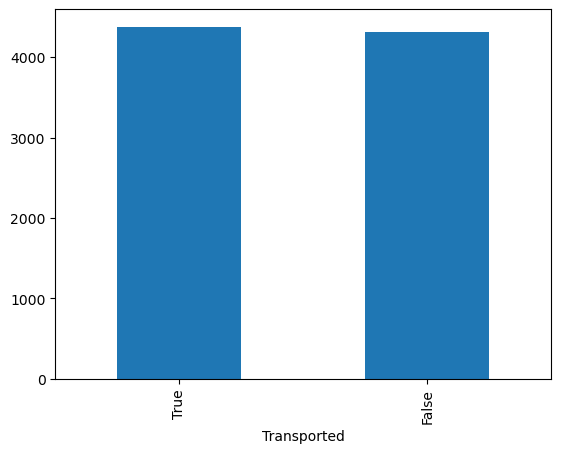

In [50]:
y_plot = data_df.Transported.value_counts()
print(y_plot)

y_plot.plot(kind="bar")

## 数据分布展示

f:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
f:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
f:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
f:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

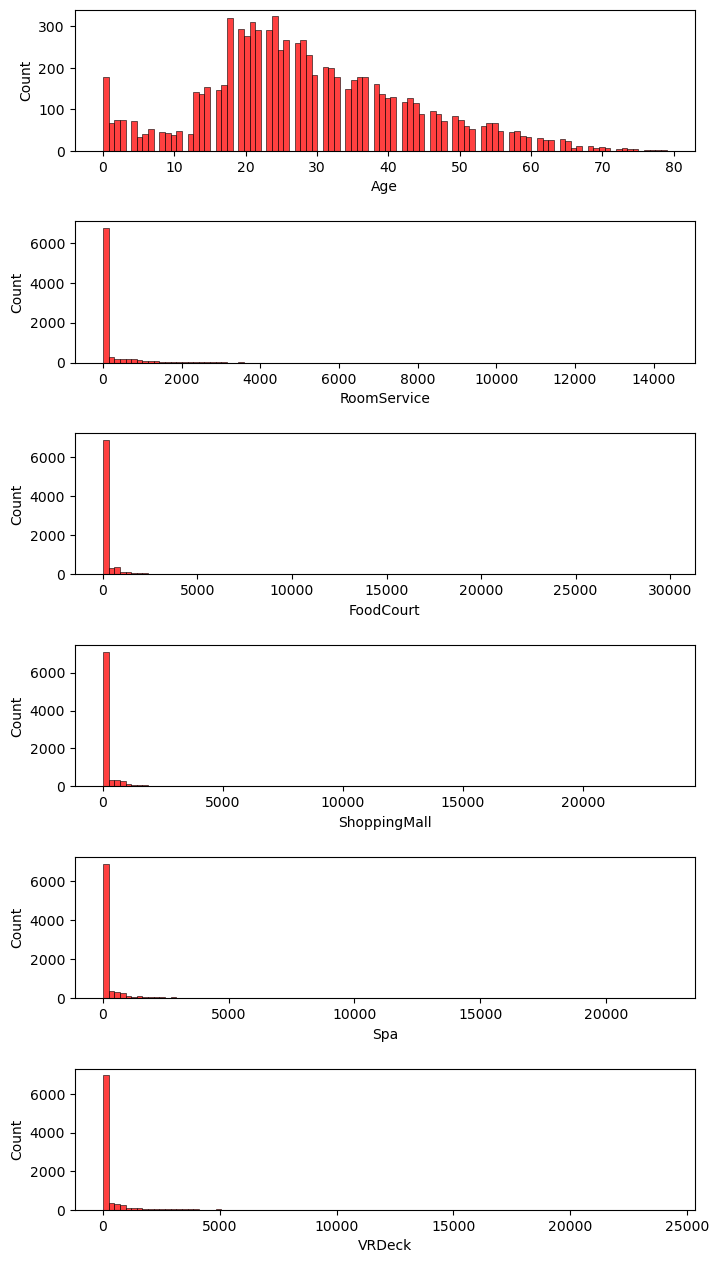

In [51]:
import matplotlib.pyplot as plt

fig , ax = plt.subplots(6,1, figsize=(8,8))

sns.histplot(data_df['Age'],color='r',bins=100,ax=ax[0])
sns.histplot(data_df['RoomService'],color='r',bins=100,ax=ax[1])
sns.histplot(data_df['FoodCourt'],color='r',bins=100,ax=ax[2])
sns.histplot(data_df['ShoppingMall'],color='r',bins=100,ax=ax[3])
sns.histplot(data_df['Spa'],color='r',bins=100,ax=ax[4])
sns.histplot(data_df['VRDeck'],color='r',bins=100,ax=ax[5])

plt.subplots_adjust(top=2.5, bottom=1, hspace=0.5)

## 数据处理

In [52]:
data_df = data_df.drop(['PassengerId','Name'],axis=1)
data_df.head(5)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [53]:
data_df.isnull().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
Transported       0
dtype: int64

In [54]:
#查看缺失值的百分度
data_na = (data_df.isnull().sum() / len(data_df)) * 100
data_na

HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Transported     0.000000
dtype: float64

In [55]:
#对缺失值进行删除操作，并查看缺失率
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False) 
missing_data = pd.DataFrame({'Missing Ratio': data_na})
missing_data.head(10)

,Missing Ratio
CryoSleep,2.496261
ShoppingMall,2.392730
VIP,2.335212
HomePlanet,2.312205
Cabin,2.289198
VRDeck,2.162660
FoodCourt,2.105142
Spa,2.105142
Destination,2.093639
RoomService,2.082135


In [56]:
missing_data.shape[0]

11

Text(0.5, 1.0, 'Percent missing data by feature')

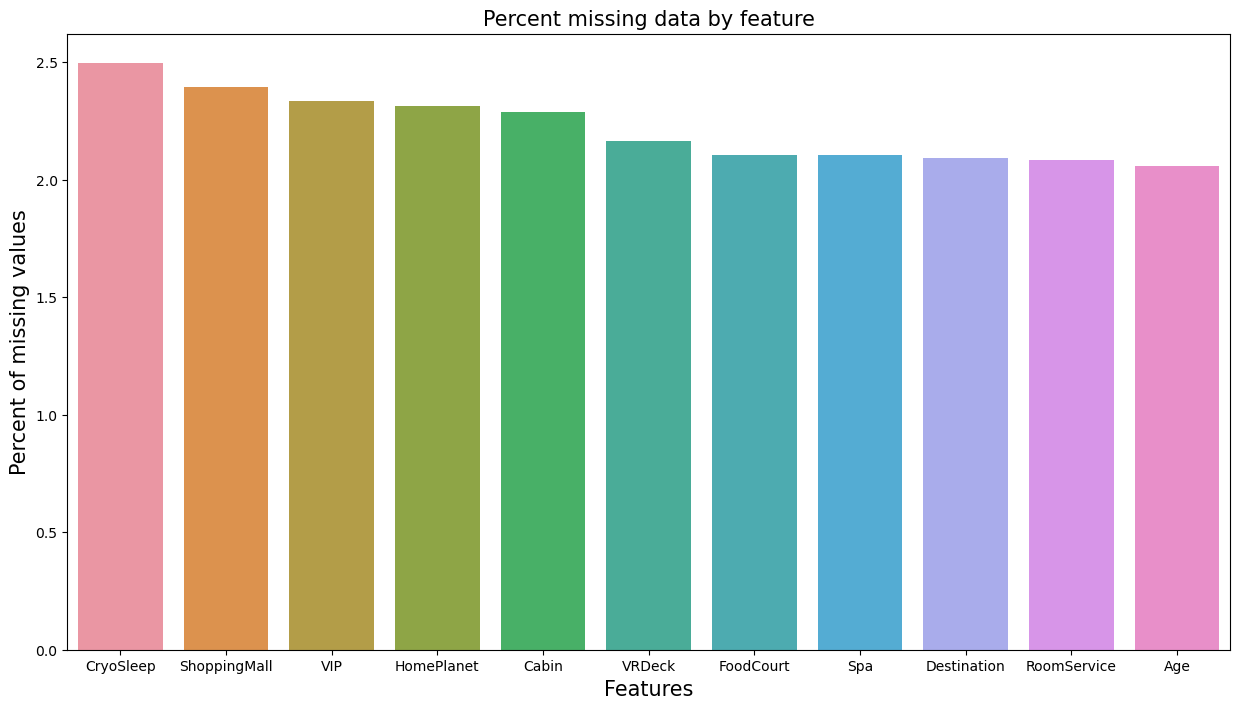

In [57]:
plt.subplots(figsize=(15, 8))
ax=plt.subplot(1,1,1)

sns.barplot(x=data_na.index,y=data_na)
# plt.xticks(rotation='90')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [58]:
# 用None或0填补25个含缺失值特征
data_df['CryoSleep'] = data_df['CryoSleep'].fillna("0")
data_df['ShoppingMall'] = data_df['ShoppingMall'].fillna("0")
data_df['VIP'] = data_df['VIP'].fillna("0")
data_df['HomePlanet'] = data_df['HomePlanet'].fillna("None")
data_df['Cabin'] = data_df['Cabin'].fillna("None")
data_df['VRDeck'] = data_df['VRDeck'].fillna("None")
data_df['FoodCourt'] = data_df['FoodCourt'].fillna("0")
data_df['Spa'] = data_df['Spa'].fillna("0")
data_df['Destination'] = data_df['Destination'].fillna("None")
data_df['RoomService'] = data_df['RoomService'].fillna("0")
data_df['Age'] = data_df['Age'].fillna("None")

### 检查数据是否还有缺失

In [59]:
data_df.isnull().sum().max()

0

### 特征相关性分析

<Axes: >

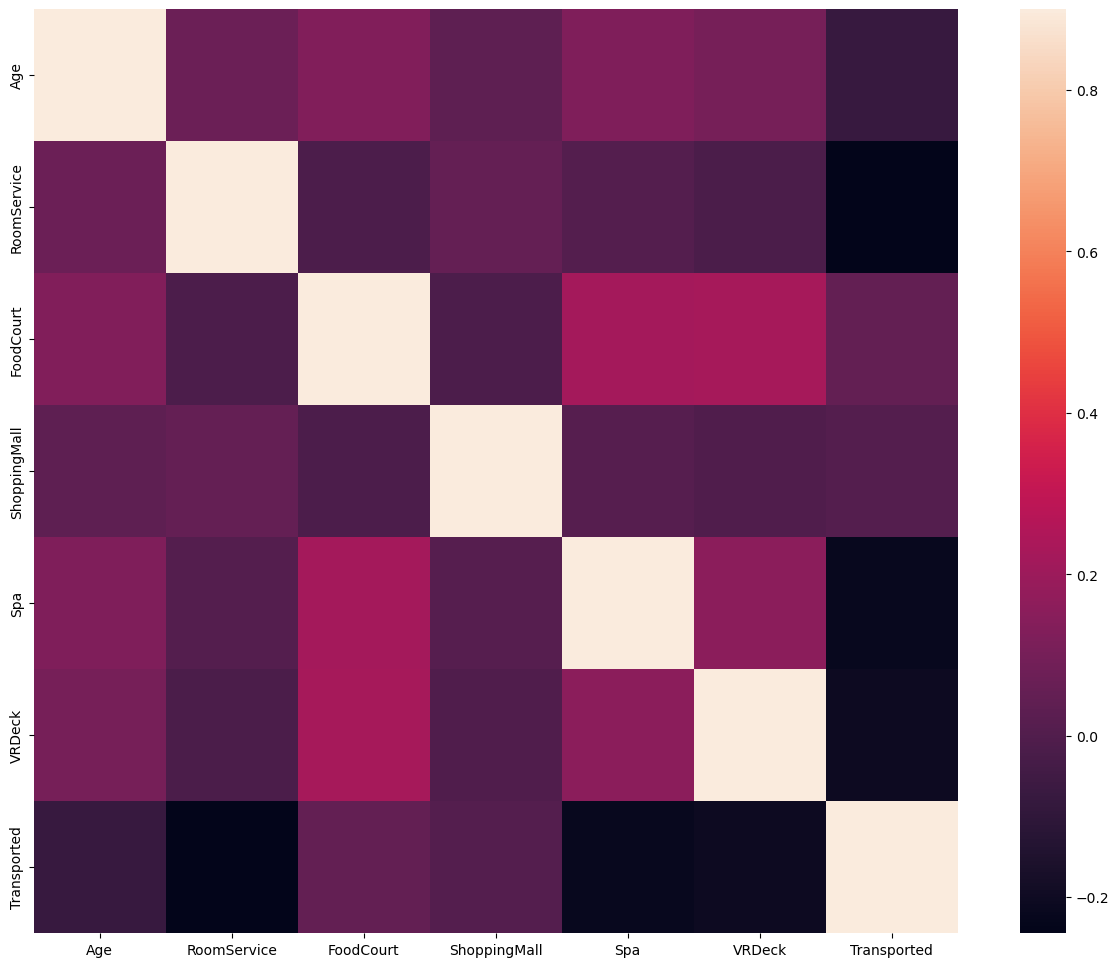

In [60]:
#seaborn的heatmap()函数
train = pd.read_csv('F:/项目练习/泰坦飞船/train.csv')

corrmat = train.corr(numeric_only=True)
plt.figure(figsize=(16,12))
sns.heatmap(corrmat,vmax=0.9, square=True)


In [61]:
#将布尔型变量转化为数值型变量['Trangsported','VIP','CryoSleep']
data_df['Transported'] = data_df['Transported'].astype(int)
data_df['VIP'] = data_df['VIP'].astype(int)
data_df['CryoSleep'] = data_df['CryoSleep'].astype(int)

In [62]:
#将Cabin列拆分成3列，分别表示Deck/Cabin_num/Side
data_df[['Deck','Cabin_num','Side']] = data_df['Cabin'].str.split('/',expand=True)
data_df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
3,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
4,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S


In [63]:
#去除掉Cabin列
data_df.drop(columns=['Cabin'],inplace=True)
data_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S


### 对数值型变量进行处理

In [64]:
import scipy as stats
from scipy.stats import norm, skew
#数值形变量应该尽量满足正态分布
numeric_data = data_df.dtypes[data_df.dtypes != "object"].index  
#计算偏度
numeric_data = data_df[numeric_data]
skewed_feats = numeric_data.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})

In [65]:
skewness.head(10)

,Skew
VIP,6.380192
CryoSleep,0.631915
Transported,-0.014495


In [66]:
data_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S


### 上述结果说明，该组数据的偏度非常高，数据的特征不适合再做正态调整

### 建立独热编码处理非数值型变量

In [76]:
data_df = pd.get_dummies(data_df)
print(data_df.shape)

(8693, 8453)


## 建立模型，导入算法包

In [68]:
# from sklearn.linear_model import ElasticNet, Lasso
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.kernel_ridge import KernelRidge
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import RobustScaler
# from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
# from sklearn.model_selection import KFold, cross_val_score, train_test_split
# from sklearn.metrics import mean_squared_error
# import xgboost as xgb
# import lightgbm as lgb

## 分成训练集和测试集

In [69]:
def split_dataset(dataset,test_ratio=0.20):
    test_indices = np.random.rand(len(dataset)) < test_ratio
    print(len(dataset))
    return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(data_df)
print('{}是训练集合，{}是测试集合'.format(len(train_ds_pd),len(valid_ds_pd)))

8693
6912是训练集合，1781是测试集合


In [70]:
Transported = data_df.pop('Transported')
data_df['Transported'] = Transported
data_df.head()
## 特征选择

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Cabin_num,Side,Transported
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,B,0,P,0
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,F,0,S,1
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,A,0,S,0
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,A,0,S,0
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,F,1,S,1


In [71]:
data_df.columns[-1]
# 假设我们只关心以下特征

'Transported'

In [73]:
data_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Cabin_num,Side,Transported
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,B,0,P,0
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,F,0,S,1
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,A,0,S,0
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,A,0,S,0
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,F,1,S,1


In [81]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_approximation import Nystroem
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# 假设 data_df 是您的 DataFrame，并且最后一列是目标变量
X = data_df.iloc[:, :-1]  # 特征
y = data_df.iloc[:, -1]   # 目标变量

# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 使用 split_dataset 函数分割数据集
train_ds_pd, valid_ds_pd = split_dataset(data_df)

# 分离训练集和测试集的特征和目标变量
X_train, X_valid = train_ds_pd.iloc[:, :-1], valid_ds_pd.iloc[:, :-1]
y_train, y_valid = train_ds_pd.iloc[:, -1], valid_ds_pd.iloc[:, -1]

# LASSO回归
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_valid)

# 核岭回归（使用Nystroem近似）
# kernelizer = Nystroem(kernel='rbf', gamma=.2, random_state=1)
# X_train_k = kernelizer.fit_transform(X_scaled)
# X_valid_k = kernelizer.transform(X_scaled)
# ridge = Ridge(alpha=1.0)
# ridge.fit(X_train_k, y_train)
# y_pred_ridge_kernel = ridge.predict(X_valid_k)

# 弹性网络
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)
y_pred_elastic_net = elastic_net.predict(X_valid)

# GBRT回归
gbrt = LGBMRegressor()
gbrt.fit(X_train, y_train)
y_pred_gbrt = gbrt.predict(X_valid)

# XGBoost回归
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_valid)

# 评估模型
mse_lasso = mean_squared_error(y_valid, y_pred_lasso)
# mse_ridge_kernel = mean_squared_error(y_valid, y_pred_ridge_kernel)
mse_elastic_net = mean_squared_error(y_valid, y_pred_elastic_net)
mse_gbrt = mean_squared_error(y_valid, y_pred_gbrt)
mse_xgb = mean_squared_error(y_valid, y_pred_xgb)

print(f'LASSO MSE: {mse_lasso}')
# print(f'Kernel Ridge MSE: {mse_ridge_kernel}')
print(f'Elastic Net MSE: {mse_elastic_net}')
print(f'GBRT MSE: {mse_gbrt}')
print(f'XGBoost MSE: {mse_xgb}')

8693
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000639 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 284
[LightGBM] [Info] Number of data points in the train set: 6985, number of used features: 142
[LightGBM] [Info] Start training from score 0.495204
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

### 根据以上结果说明模型效果评价排序为(MSE)：GBRT<XGBboost<ElasticNet<Lasso




In [35]:
# 特征重要性
feature_importance_lasso = lasso.coef_
feature_importance_elastic_net = elastic_net.coef_
feature_importance_gbrt = gbrt.feature_importances_
feature_importance_xgb = xgb.feature_importances_

print(f'Feature importance for LASSO: {feature_importance_lasso}')
print(f'Feature importance for Elastic Net: {feature_importance_elastic_net}')
print(f'Feature importance for GBRT: {feature_importance_gbrt}')    
print(f'Feature importance for XGBoost: {feature_importance_xgb}')

Feature importance for LASSO: [ 0. -0. -0. ...  0. -0.  0.]
Feature importance for Elastic Net: [ 0.18970457 -0.         -0.         ...  0.         -0.
  0.        ]
Feature importance for GBRT: [ 57  27  73 ...   0 108  88]
Feature importance for XGBoost: [0.05228049 0.00145585 0.00919588 ... 0.         0.00346137 0.00683801]


### 最终选择GBRT模型对进行预测

对test模型进行相同的处理方式

In [43]:
#加入测试集
data_df_test = pd.read_csv('F:/项目练习/泰坦飞船/test.csv')

#删除不需要的列
data_df_test = data_df_test.drop(['PassengerId','Name'],axis=1)

#填补空缺值
data_df_test['CryoSleep'] = data_df_test['CryoSleep'].fillna("0")
data_df_test['ShoppingMall'] = data_df_test['ShoppingMall'].fillna("0")
data_df_test['VIP'] = data_df_test['VIP'].fillna("0")
data_df_test['HomePlanet'] = data_df_test['HomePlanet'].fillna("None")
data_df_test['Cabin'] = data_df_test['Cabin'].fillna("None")
data_df_test['VRDeck'] = data_df_test['VRDeck'].fillna("None")
data_df_test['FoodCourt'] = data_df_test['FoodCourt'].fillna("0")
data_df_test['Spa'] = data_df_test['Spa'].fillna("0")
data_df_test['Destination'] = data_df_test['Destination'].fillna("None")
data_df_test['RoomService'] = data_df_test['RoomService'].fillna("0")
data_df_test['Age'] = data_df_test['Age'].fillna("None")

#转化布尔型变量为0,1

data_df_test['VIP'] = data_df_test['VIP'].astype(int)
data_df_test['CryoSleep'] = data_df_test['CryoSleep'].astype(int)

#把Cabin拆成3列
data_df_test[['Deck','Cabin_num','Side']] = data_df_test['Cabin'].str.split('/',expand=True)
data_df_test.drop(columns=['Cabin'],inplace=True)

#设置独热编码
data_df_test = pd.get_dummies(data_df_test)

#添加最后一列——目标列（空列）
data_df_test['Transported'] = ''
data_df_test.head()



,CryoSleep,VIP,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_None,Destination_55 Cancri e,Destination_None,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,...,Cabin_num_990,Cabin_num_992,Cabin_num_993,Cabin_num_994,Cabin_num_995,Cabin_num_996,Cabin_num_997,Side_P,Side_S,Transported
0,1,0,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,
1,0,0,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,
2,1,0,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,
3,0,0,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,
4,0,0,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,


最后的处理——测试集train_ds_pd；训练集data_df_test

In [80]:
X_test = data_df_test.iloc[:, :-1]  # 选择所有行，除了最后一列目标变量的特征
# X_test_scaled = scaler.transform(X_test)  # 使用之前训练集的scaler进行标准化

# y_pred_gbrt_test = gbrt.predict(X_test_scaled)

# data_df_test['Transported'] = y_pred_gbrt_test

data_df_test.to_csv('test_predictions.csv', index=False)